## Understanding Image Dataset

**Multi-Class Image Classification** Machine Learning project.

We want to determine what **type of class** the image is amongst :

* automobile
* cat
* dog



### 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 2. Import files and understand format:

* There are **5 train** files (data_batch_1, data_batch_2, ...), **one test** (test_batch) and **label names** (batches.meta).
* The dataset consists of **60,000** 32x32 colour **images** in 10 classes, with **6,000** images per class.
* There are **50,000 training images** and **10,000 test images.**
* Each file contains a dictionary with the following elements:

    * **data:** a 10,000 x 3,072 numpy array of uint8s. Each row of the array stores a 32 x 32 colour image. The first 1,024 entries contain the red channel values, the next 1,024 the green, and the final 1,024 the blue.
    
    * The image is stored in **row-major order**, so that the first 32 entries of the array are the red channel values of the first row of the image.
    <br>
    <br>
    <br>

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Row_and_column_major_order.svg/1920px-Row_and_column_major_order.svg.png"  width="200" height="300">
    <br>
    <br>
    
    * **labels**: a list of 10,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array **data.**


Images available :

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck



### Labels

In [3]:
# Get the labels, transform type from byte to string and store them in label array.

# Function to unwrap
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        labels = dict[b'label_names']
    return labels

file = "../data/raw/batches.meta"

byte_labels = unpickle(file)

# Show labels
print("Image labels in byte format: ",byte_labels)

# b'This is a byte object.' => We need to convert it to string
print("Initial byte format:",type(byte_labels[0]))

labels =  list(map(lambda x: x.decode('utf-8'),byte_labels))
print("Check byte format converted to string:",type(labels[0]))
print("Image labels in string format:",labels)


Image labels in byte format:  [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
Initial byte format: <class 'bytes'>
Check byte format converted to string: <class 'str'>
Image labels in string format: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
# Unwrap first file
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

file = "../data/raw/data_batch_1"

dict = unpickle(file)

print(dict.keys())



dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


### Display 1 Image

Image size in 3D (32, 32, 3)


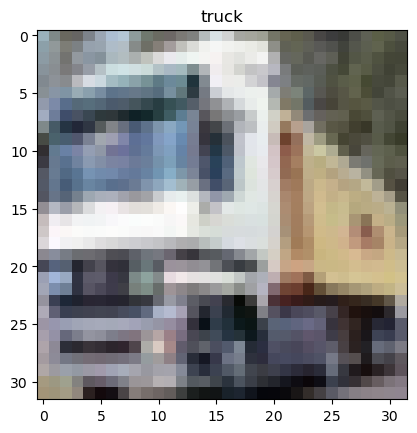

In [6]:
first_image = np.array(dict[b'data'][1])

# Gives us label 6
first_image_label = np.array(dict[b'labels'][1])

# Reshape image
first_image = first_image.reshape(3,32,32)
# Transpose image
first_image = first_image.transpose(1,2,0)


plt.title(labels[first_image_label])
print("Image size in 3D",first_image.shape)
plt.imshow(first_image);



### Transform to dataframe

In [23]:
X = first_image.reshape(-1,3)/255

print("Image size in 2D", X.shape)
df = pd.DataFrame(data=X)
print(len(X.reshape(-1)))

# Start index at 1 instead of 0
df.index = np.arange(1,len(df)+1)
df

Image size in 2D (1024, 3)
3072


,0,1,2
1,0.603922,0.694118,0.733333
2,0.494118,0.537255,0.533333
3,0.411765,0.407843,0.372549
4,0.400000,0.396078,0.388235
5,0.490196,0.513725,0.545098
...,...,...,...
1020,0.525490,0.498039,0.521569
1021,0.549020,0.509804,0.533333
1022,0.560784,0.521569,0.545098
1023,0.560784,0.525490,0.556863


In [25]:
i = 1

while i<=1:
    add_to_df = dict[b'data'][i].reshape(3,32,32)
    add_to_df = add_to_df.transpose(1,2,0)
    add_to_df = add_to_df.reshape(-1,3)/255

    add_to_df = pd.DataFrame(data=add_to_df)
    print(add_to_df.shape)
    df = pd.concat([df,add_to_df])

    i+=1
df

(1024, 3)


,0,1,2
1,0.603922,0.694118,0.733333
2,0.494118,0.537255,0.533333
3,0.411765,0.407843,0.372549
4,0.400000,0.396078,0.388235
5,0.490196,0.513725,0.545098
...,...,...,...
1019,0.525490,0.498039,0.521569
1020,0.549020,0.509804,0.533333
1021,0.560784,0.521569,0.545098
1022,0.560784,0.525490,0.556863


In [27]:
len(dict[b'data'])

10000

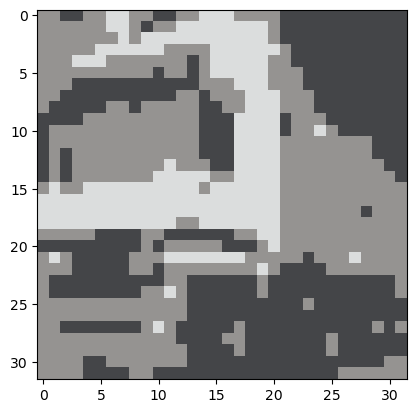

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(first_image.shape)

plt.imshow(segmented_img);


### Store all files

In [77]:
i = 0

while i<=10:
    index_label = dict[b'labels'][i]

    print(labels[index_label])
    i+=1


frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat
deer


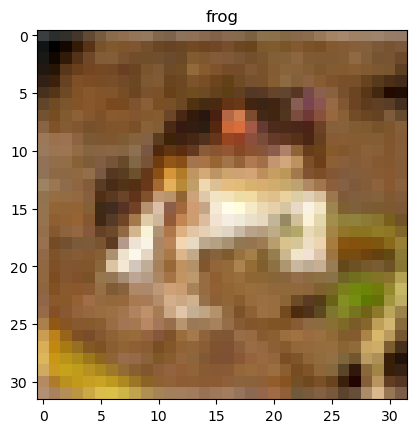

0


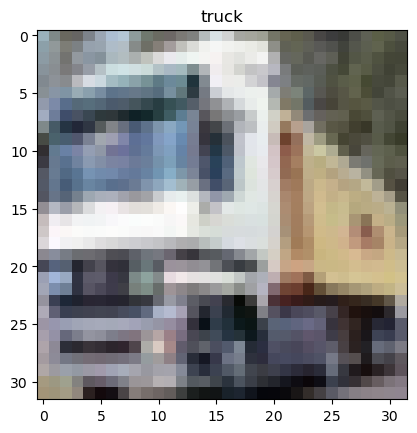

1


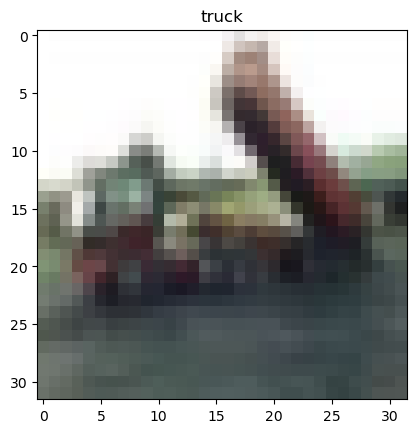

2


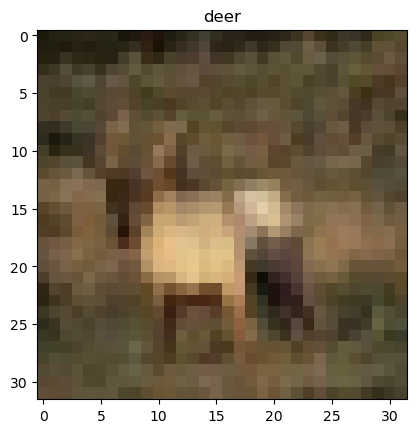

3


In [78]:
i = 0

while i<=3:
    image = dict[b'data'][i].reshape(3,32,32)
    image = image.transpose(1,2,0)

    index_label = dict[b'labels'][i]
    
    plt.title(labels[first_image_label])
    plt.imshow(image)
    plt.title(labels[index_label])
    plt.show()
    print(i)
    i+=1
